# Credit cards
simple credit card regression


In [37]:
# Get data from here:
# https://packt.link/wensZ

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400. # High res

In [91]:
df = pd.read_csv('Data/cleaned_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  26664 non-null  int64 
 1   ID                          26664 non-null  object
 2   LIMIT_BAL                   26664 non-null  int64 
 3   SEX                         26664 non-null  int64 
 4   EDUCATION                   26664 non-null  int64 
 5   MARRIAGE                    26664 non-null  int64 
 6   AGE                         26664 non-null  int64 
 7   PAY_1                       26664 non-null  int64 
 8   PAY_2                       26664 non-null  int64 
 9   PAY_3                       26664 non-null  int64 
 10  PAY_4                       26664 non-null  int64 
 11  PAY_5                       26664 non-null  int64 
 12  PAY_6                       26664 non-null  int64 
 13  BILL_AMT1                   26664 non-null  in

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split\
                                   (df['LIMIT_BAL']\
                                    .values.reshape(-1,1),\
                                    df['default payment next month']\
                                    .values, test_size=0.2,\
                                    random_state=24)


In [94]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.1,
                       class_weight=None,
                       dual=False,
                       fit_intercept=True,
                       intercept_scaling=1,
                       max_iter=100,
                       multi_class='auto',
                       n_jobs=None,
                       penalty='l2',
                       random_state=None,
                       solver='liblinear',
                       tol=0.0001,
                       verbose=0,
                       warm_start=False)

In [95]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [96]:
y_pred = lr.predict(X_test)

In [97]:
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

In [98]:
lr.score(X_test, y_test)

0.7834239639977498

In [99]:
# Build a confusion matrix
P = sum(y_test)                      # Number of positive samples
TP = sum((y_test==1) & (y_pred==1))  # Number of True positives
TPR = TP / P

FN = sum((y_test==1) & (y_pred==0))  # Number of False Negatives
FNR = FN / P
TPR, FNR

(0.0, 1.0)

In [83]:
# Since True Positive Rate = 0 and False Negative rate = 1
# Our model basically predicts EVERYTHING is negative
# Its a "Null" model


In [100]:
N = sum(y_test==0)
TN = sum((y_test==0) & (y_pred==0))
TNR = TN / N

FP = sum((y_test==0) & (y_pred==1))
FPR = FP / N
TNR, FPR

(1.0, 0.0)

In [101]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]])

In [102]:
y_pred_proba = lr.predict_proba(X_test)
pos_proba = y_pred_proba[:,1]

Text(0, 0.5, 'Number of samples')

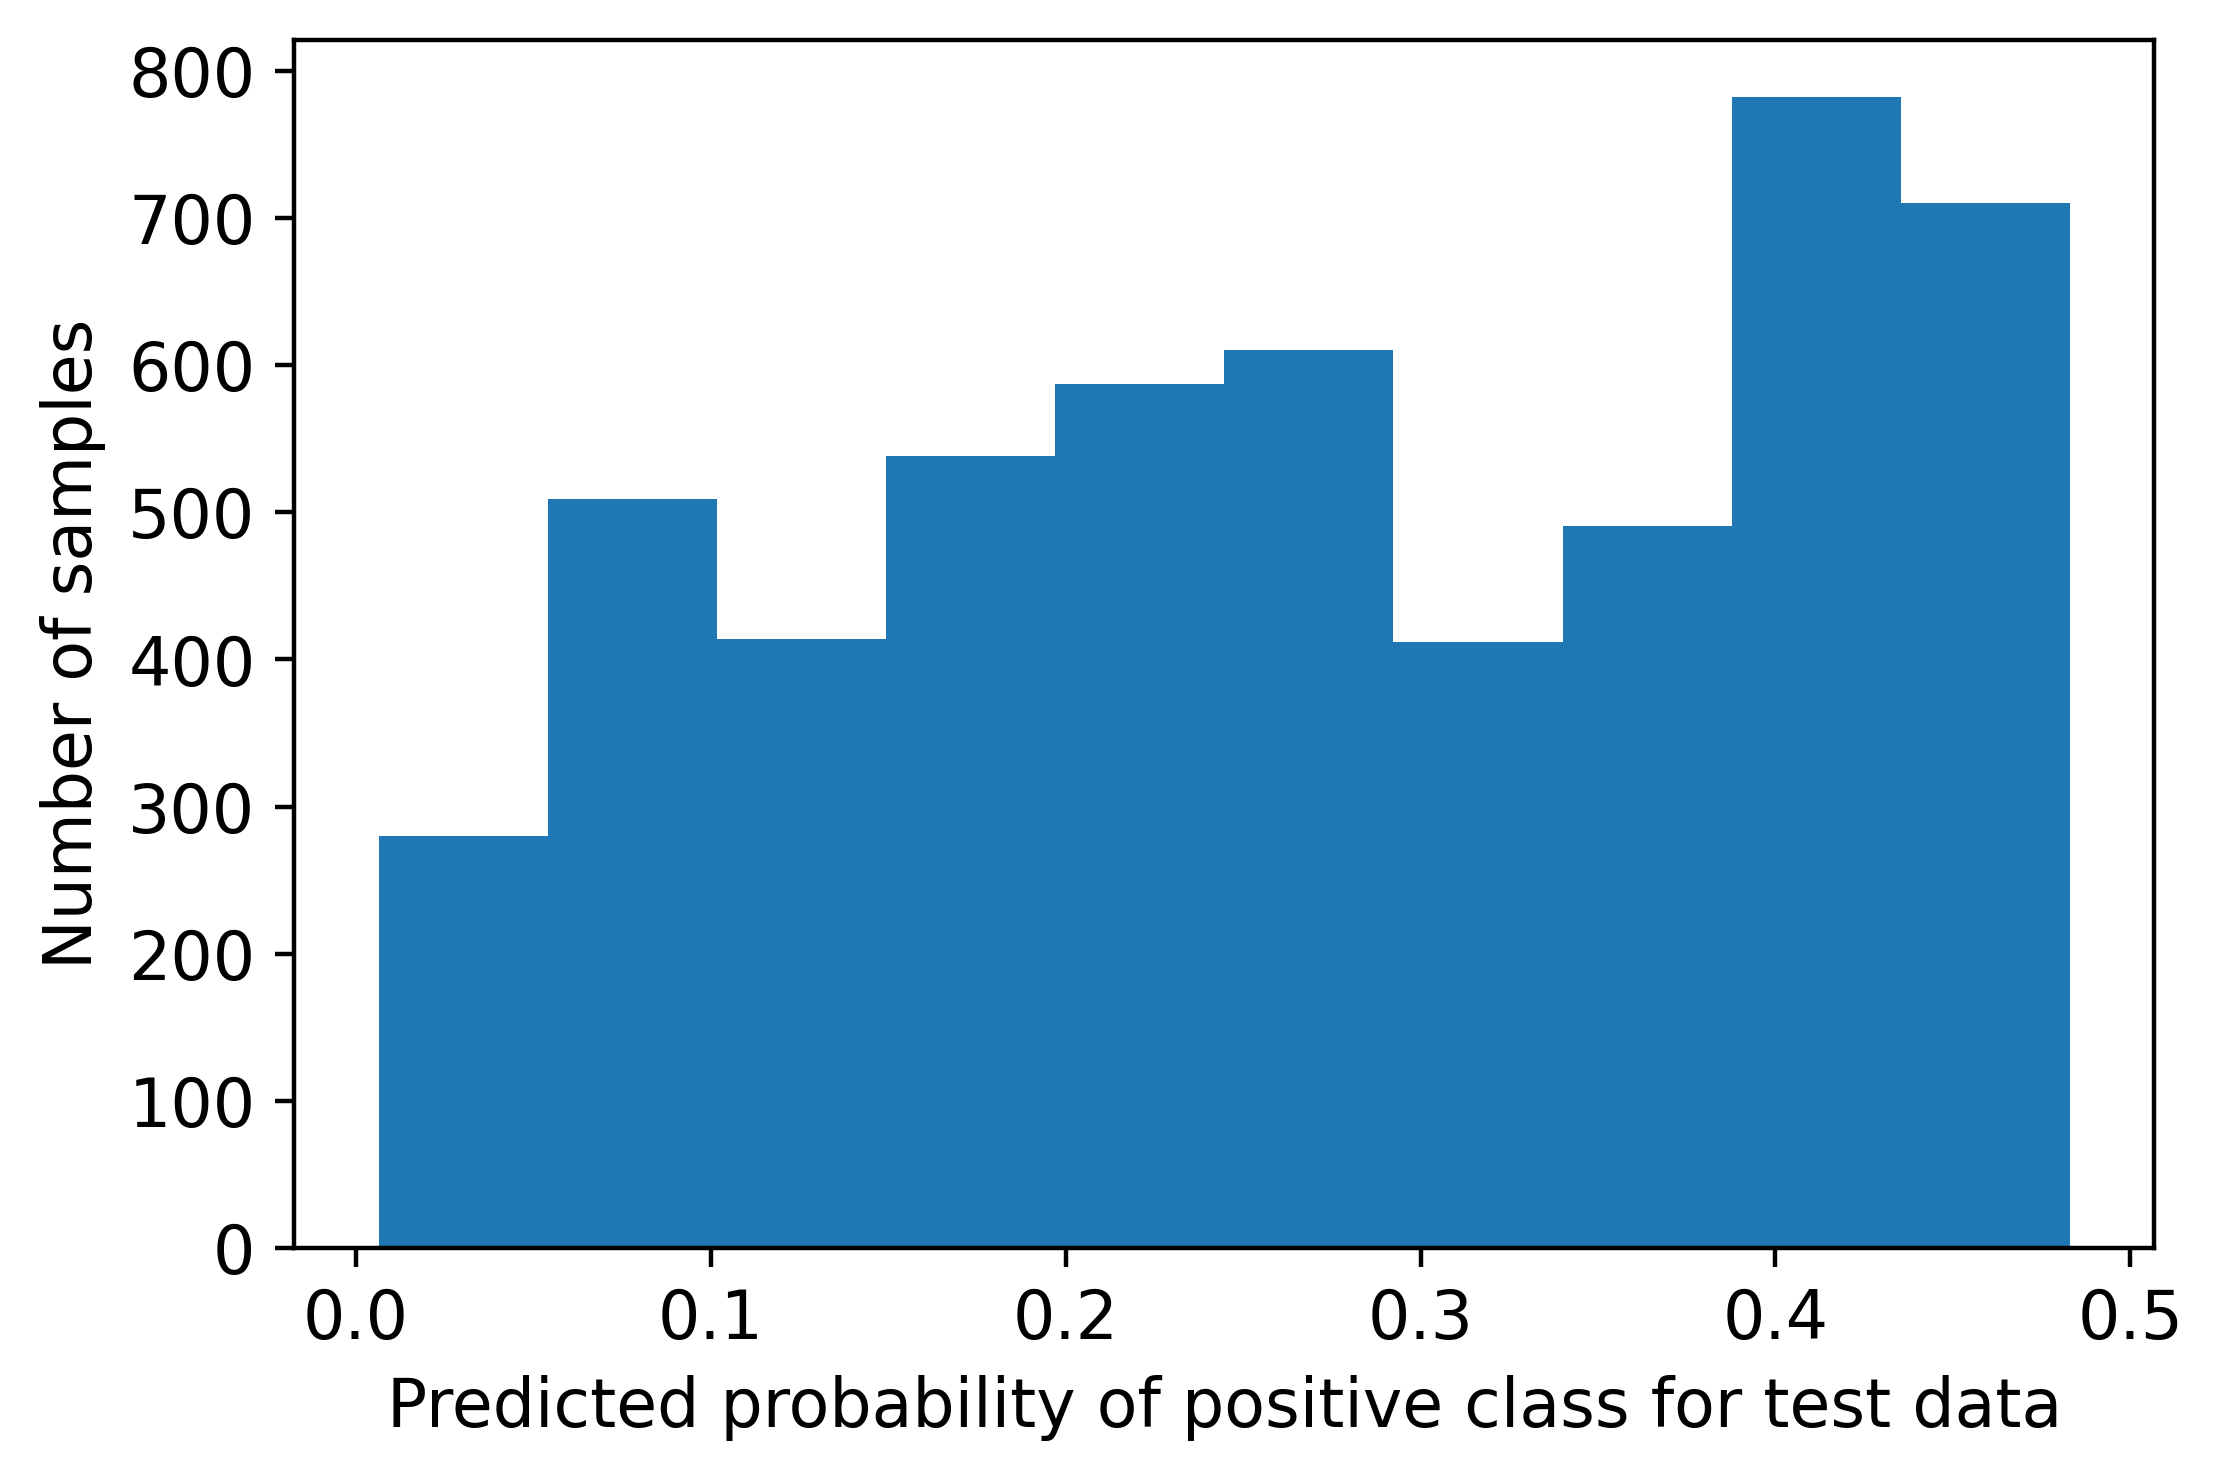

In [103]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class '\
           'for test data')
plt.ylabel('Number of samples')

Text(0, 0.5, 'Number of samples')

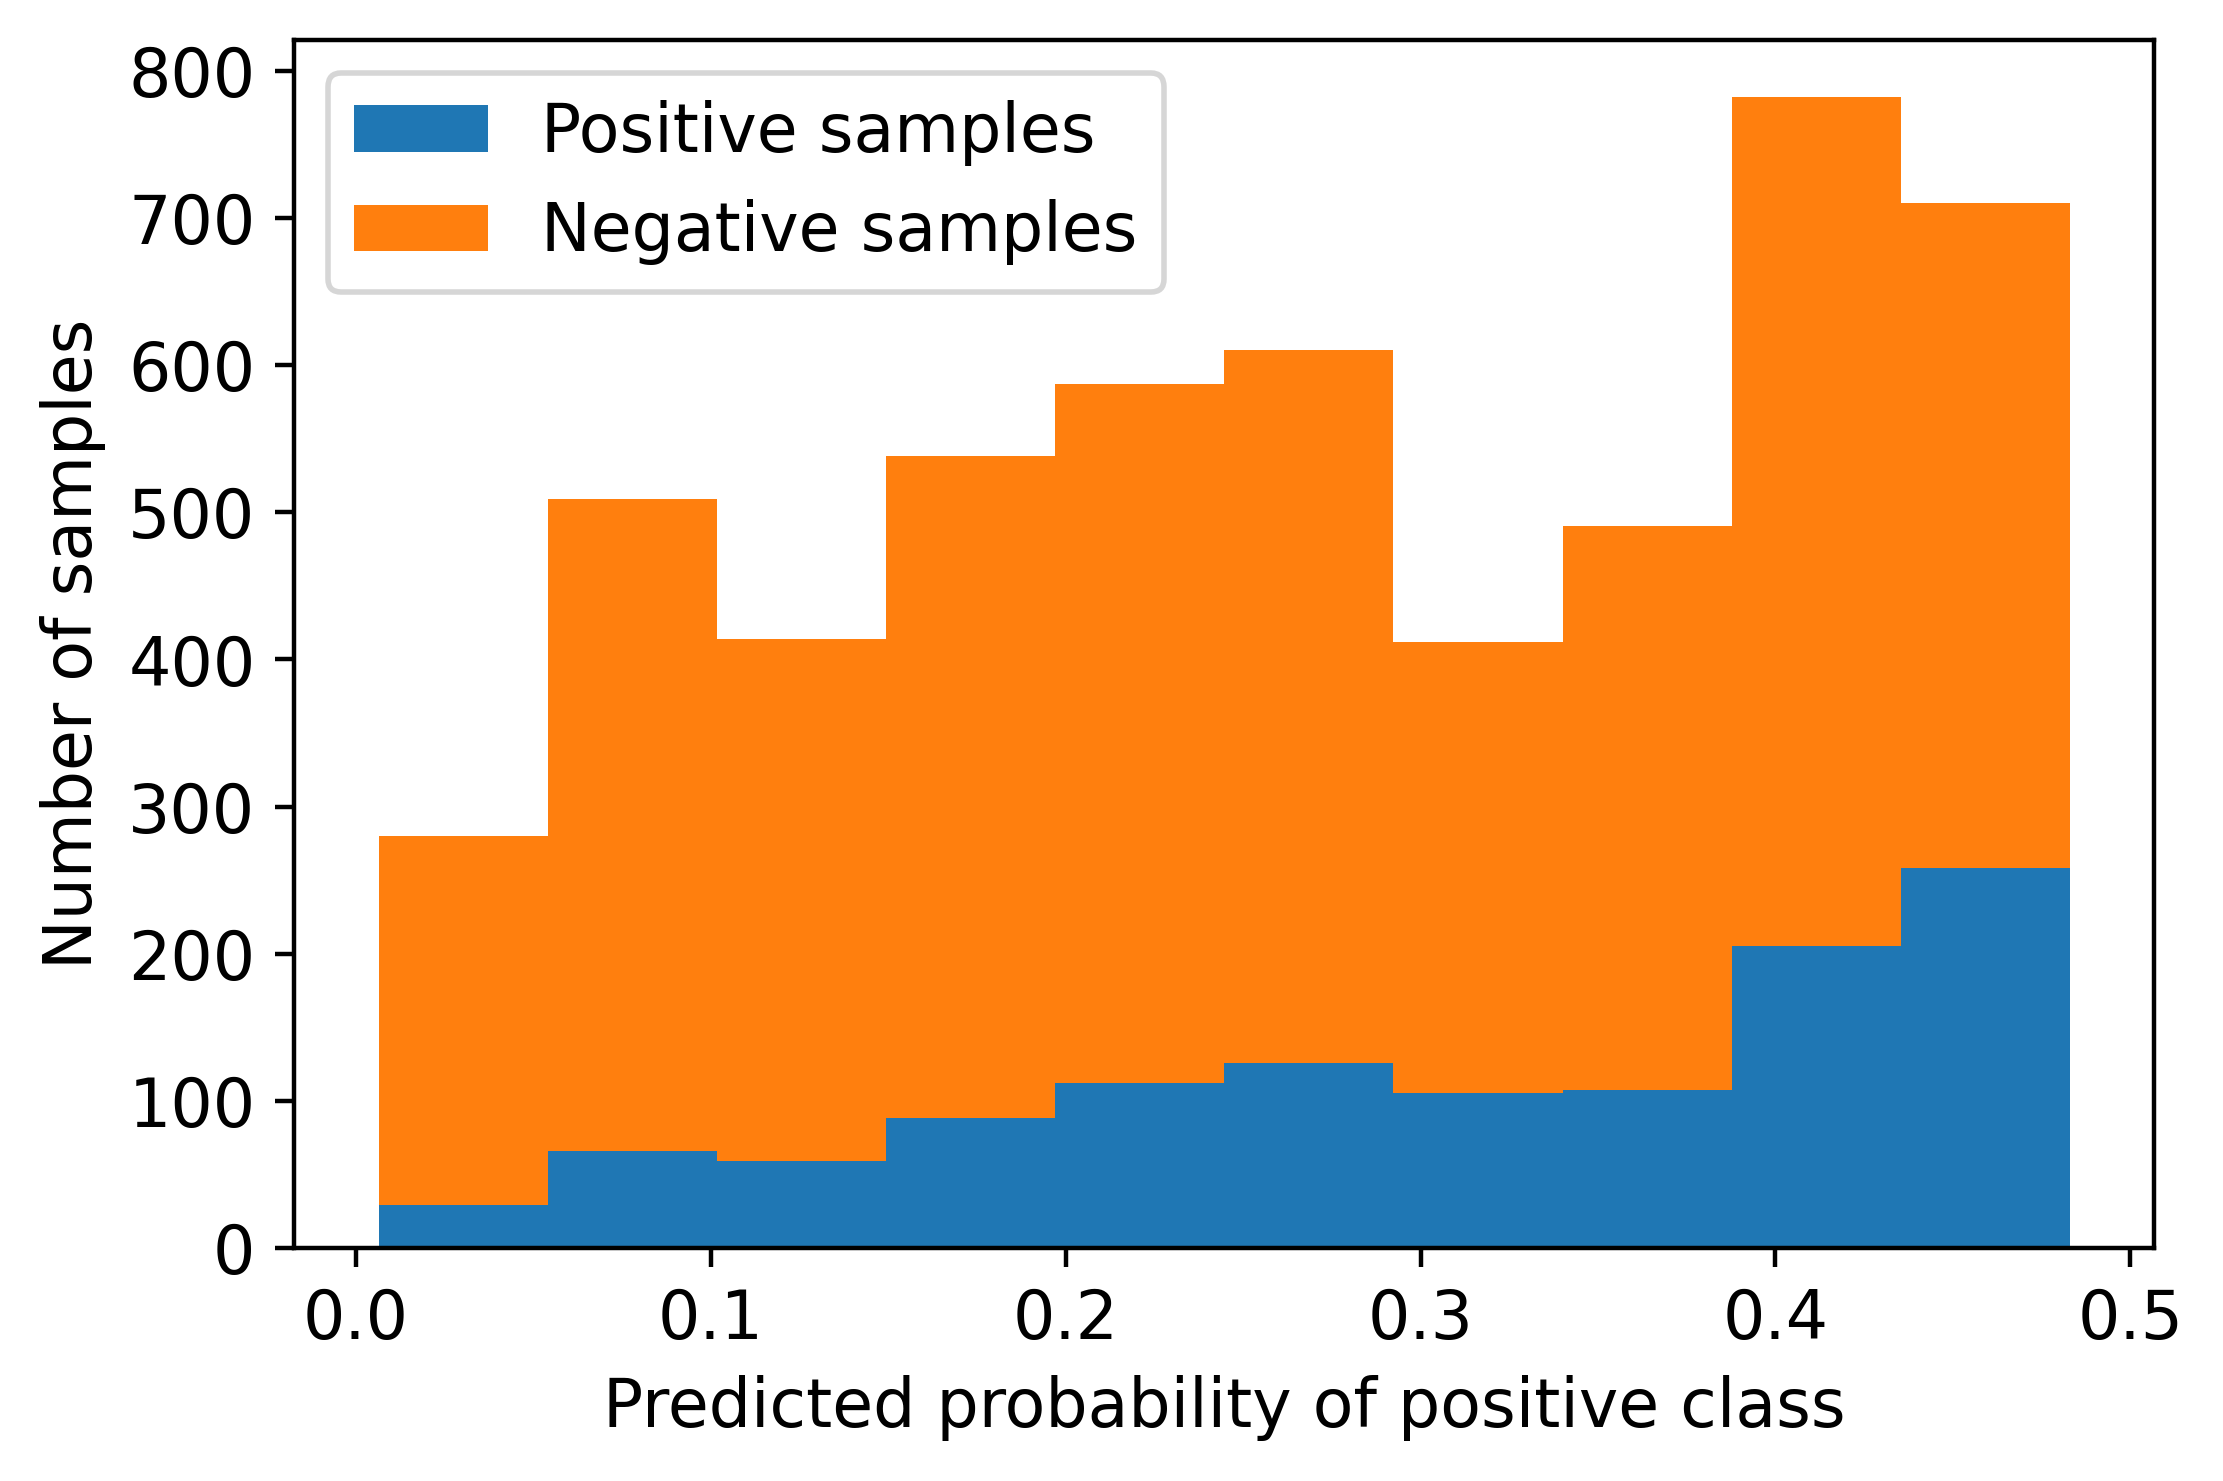

In [104]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba],\
          histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

In [105]:
from sklearn import metrics
fpr, tpr, trehsolds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC Curve')

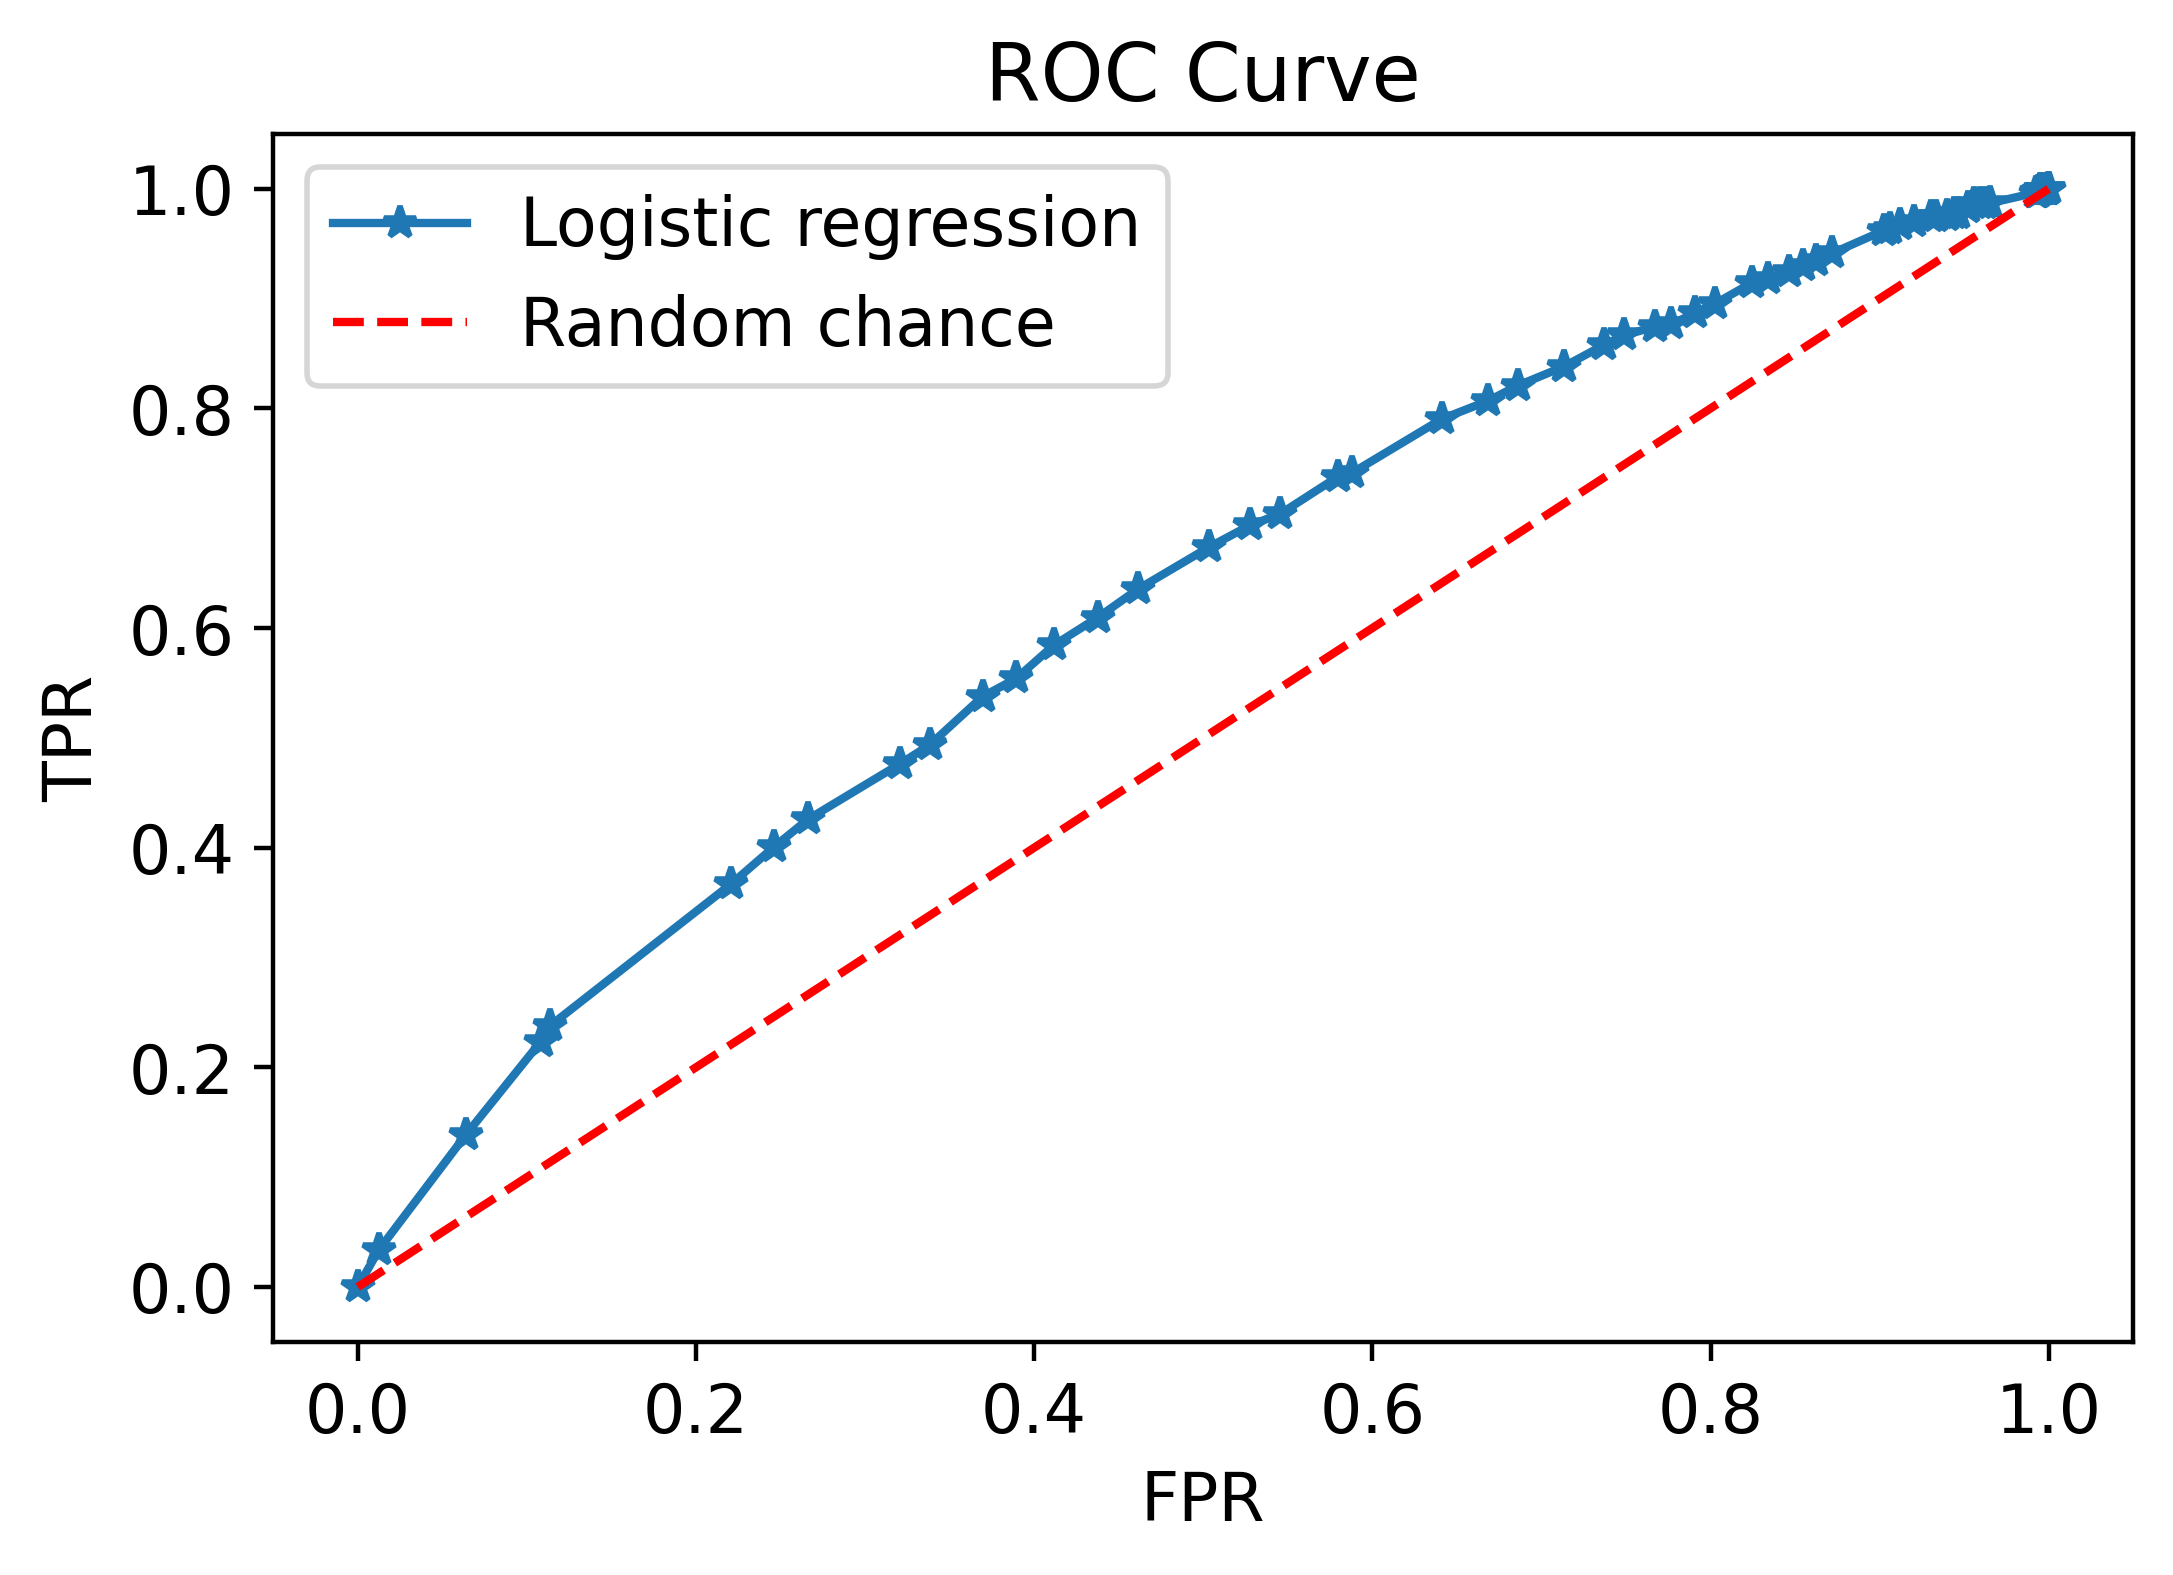

In [106]:
plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC Curve")

In [68]:
# precision = tp / (tp + fp)

0

In [107]:
metrics.roc_auc_score(y_test, pos_proba)

0.6201990844642832